# ***SmartBridge Assignment 2 (Data Science)

# Q1

In [1]:
# Download the dataset by clicking on dataset link

# Q2

In [2]:
# Load the Dataset

import pandas as pd
df = pd.read_csv('titanic_DataSet.csv')

# Q3

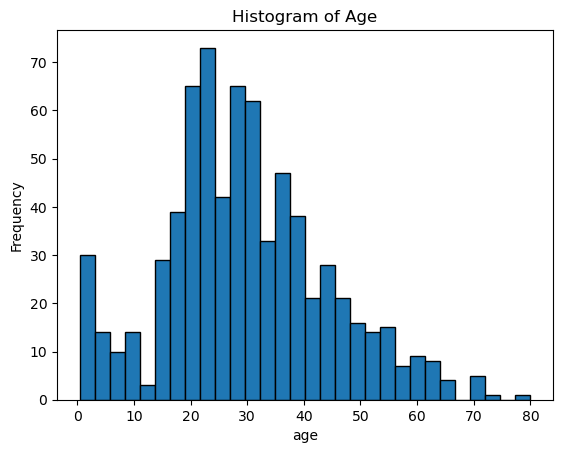

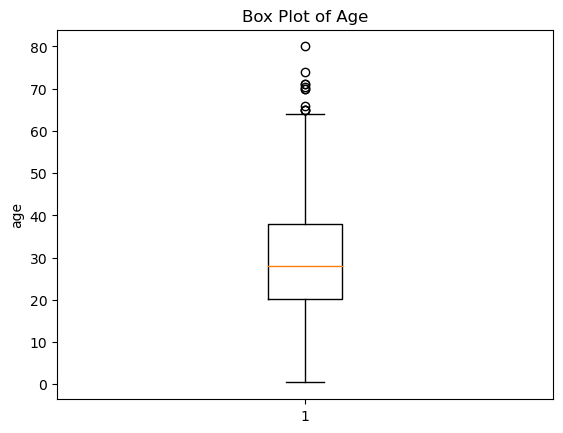

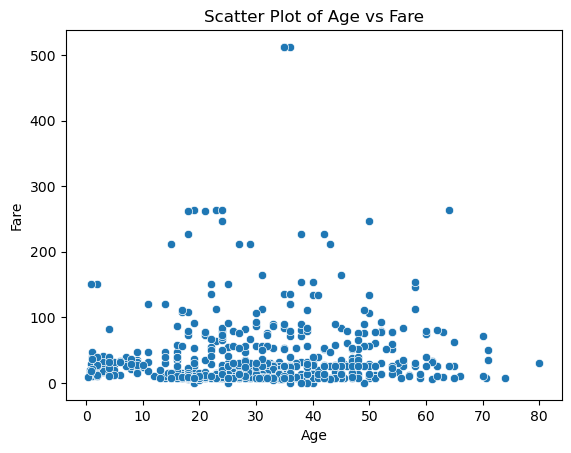

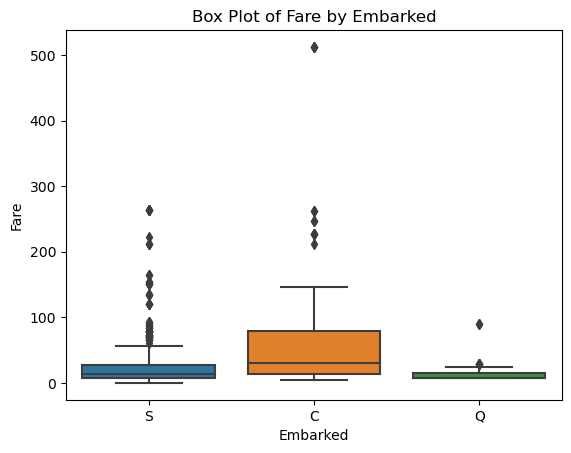

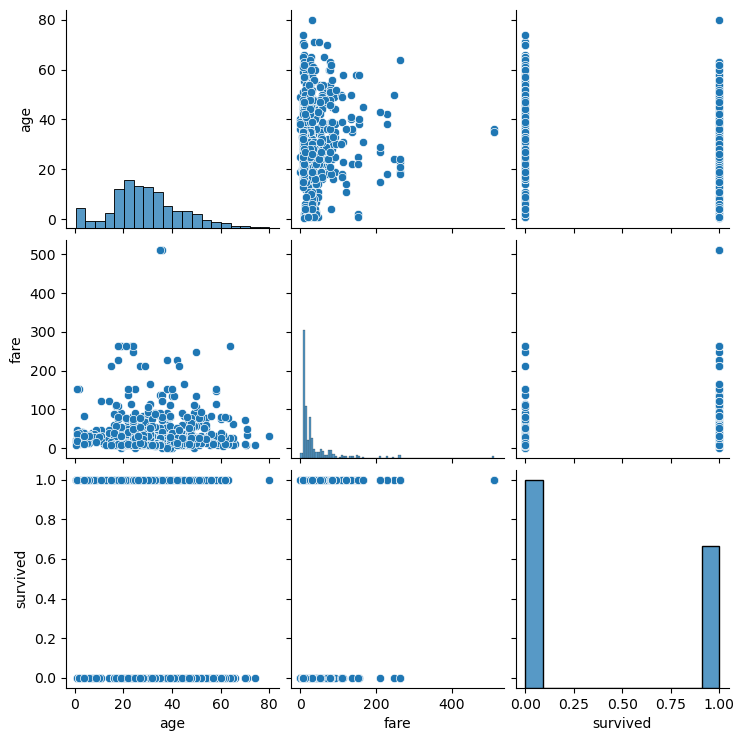

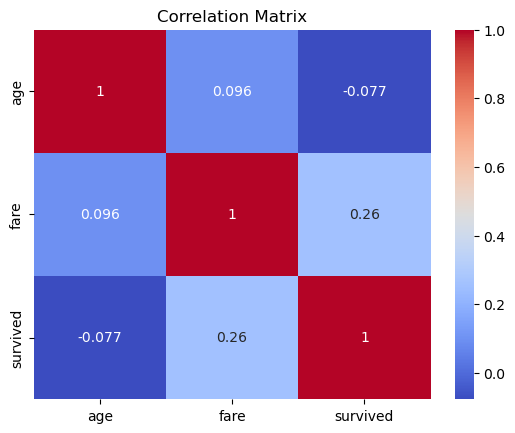

In [8]:
# Visualizations

# 1. Univariate Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('titanic_DataSet.csv')

# Histogram
plt.hist(data['age'].dropna(), bins=30, edgecolor='black')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

# Box Plot
plt.boxplot(data['age'].dropna())
plt.ylabel('age')
plt.title('Box Plot of Age')
plt.show()

# 2. Bi-variate Analysis

# Scatter Plot
sns.scatterplot(x='age', y='fare', data=data)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Age vs Fare')
plt.show()

# Box Plot
sns.boxplot(x='embarked', y='fare', data=data)
plt.xlabel('Embarked')
plt.ylabel('Fare')
plt.title('Box Plot of Fare by Embarked')
plt.show()

# 3. Multi-variate Analysis

# Scatter Plot Matrix
sns.pairplot(data[['age', 'fare', 'survived']].dropna())
plt.show()

# Correlation Matrix
correlation_matrix = data[['age', 'fare', 'survived']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



# Q4

In [9]:
# Descriptive Statistics

import pandas as pd
data = pd.read_csv('titanic_DataSet.csv')

descriptive_stats = data.describe()
print(descriptive_stats)

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


# Q5

In [22]:
# Handling missing values

missing_values1 = data.isnull().sum()
print(missing_values1)

mean_age = data['age'].mean()
data_filled = data.fillna({'age': mean_age})
data_filled = data.ffill()
data_new = data.dropna()

print("---------------------------------------------")

missing_values2 = data_new.isnull().sum()
print(missing_values2)


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
---------------------------------------------
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


# Q6

In [23]:
# Finding and replacing outliers

# Identifying Outliers
Q1 = data['fare'].quantile(0.25)
Q3 = data['fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['fare'] < lower_bound) | (data['fare'] > upper_bound)]

# Replacing Outliers
median_fare = data['fare'].median()
data.loc[(data['fare'] < lower_bound) | (data['fare'] > upper_bound), 'fare'] = median_fare




# Q7

In [26]:
# Checking for categorical columns and encoding

# Identifying Categorical Columns
categorical_cols = data.select_dtypes(include=['object']).columns
print(categorical_cols)

# Encoding
encoded_data = pd.get_dummies(data, columns=categorical_cols)


Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')


# Q8

In [30]:
# Splitting data into independent and independent variables

X = data.drop('survived', axis=1) 
y = data['survived'] 


# Q9

In [34]:
# Scale the independent variables

from sklearn.preprocessing import StandardScaler

# Scale independent variable
X = data.drop('survived', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


ValueError: could not convert string to float: 'male'

# Q10

In [36]:
# Spliting the data into training and testing

from sklearn.model_selection import train_test_split
X = data.drop('survived', axis=1)  
y = data['survived']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
